In [1]:
import pandas as pd

In [2]:
#import the dataset
advData = pd.read_csv("Dataset/Advertising Budget and Sales.csv",index_col=0)
                      

In [3]:
advData.shape

(200, 4)

In [4]:
#view top5 records
advData.size

800

In [5]:
#view the columns of the dataset
advData.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

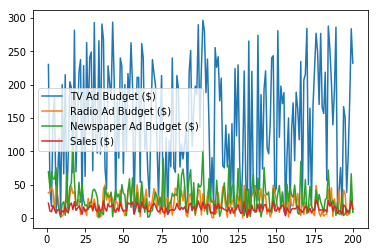

In [7]:
advData.plot()

In [8]:
#create fetaure slice for needed features
X_feature = advData[['Newspaper Ad Budget ($)','Radio Ad Budget ($)','TV Ad Budget ($)']]

In [9]:
X_feature.shape

(200, 3)

In [10]:
#view the feature selections
X_feature.head()

,Newspaper Ad Budget ($),Radio Ad Budget ($),TV Ad Budget ($)
1,69.2,37.8,230.1
2,45.1,39.3,44.5
3,69.3,45.9,17.2
4,58.5,41.3,151.5
5,58.4,10.8,180.8


In [11]:
Y_target = advData[['Sales ($)']]

In [12]:
Y_target.head()

,Sales ($)
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [13]:
Y_target.shape

(200, 1)

In [14]:
X_feature.shape

(200, 3)

In [16]:
#split into training  and test set
#deaflut  75: 25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature, Y_target, random_state=1)

In [17]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(150, 3) (150, 1) (50, 3) (50, 1)


In [18]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print(lreg.coef_)

[[0.00345046 0.17915812 0.04656457]]


In [20]:
print(lreg.intercept_)

[2.87696662]


In [21]:
#make predictions
y_pred = lreg.predict(x_test)
y_pred

array([[21.70910292],
       [16.41055243],
       [ 7.60955058],
       [17.80769552],
       [18.6146359 ],
       [23.83573998],
       [16.32488681],
       [13.43225536],
       [ 9.17173403],
       [17.333853  ],
       [14.44479482],
       [ 9.83511973],
       [17.18797614],
       [16.73086831],
       [15.05529391],
       [15.61434433],
       [12.42541574],
       [17.17716376],
       [11.08827566],
       [18.00537501],
       [ 9.28438889],
       [12.98458458],
       [ 8.79950614],
       [10.42382499],
       [11.3846456 ],
       [14.98082512],
       [ 9.78853268],
       [19.39643187],
       [18.18099936],
       [17.12807566],
       [21.54670213],
       [14.69809481],
       [16.24641438],
       [12.32114579],
       [19.92422501],
       [15.32498602],
       [13.88726522],
       [10.03162255],
       [20.93105915],
       [ 7.44936831],
       [ 3.64695761],
       [ 7.22020178],
       [ 5.9962782 ],
       [18.43381853],
       [ 8.39408045],
       [14

In [22]:
#Calculate mean squared error
from sklearn import metrics
import numpy as np

In [23]:
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))

MSE:  1.9730456202283426


In [24]:
print("R sqd coeff: ", metrics.r2_score(y_test,y_pred))

R sqd coeff:  0.915621361379223


In [25]:
type(y_test)

pandas.core.frame.DataFrame

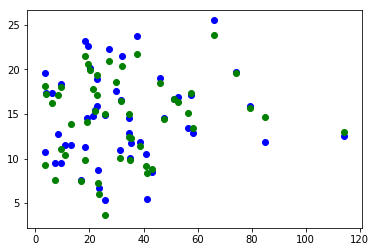

In [26]:
plt.scatter(x_test['Newspaper Ad Budget ($)'],y_test, color='blue')
plt.scatter(x_test['Newspaper Ad Budget ($)'],y_pred, color='green')

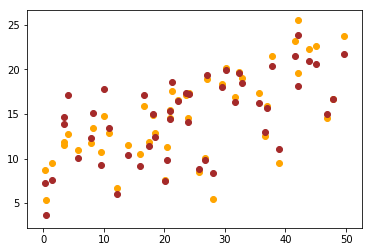

In [27]:
plt.scatter(x_test['Radio Ad Budget ($)'],y_test, color='orange')
plt.scatter(x_test['Radio Ad Budget ($)'],y_pred, color='brown')

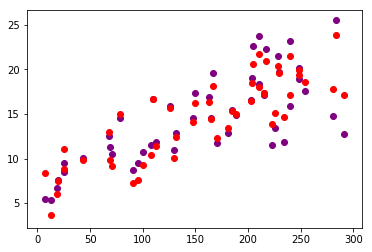

In [28]:
plt.scatter(x_test['TV Ad Budget ($)'],y_test, color='purple')
plt.scatter(x_test['TV Ad Budget ($)'],y_pred, color='red')

/home/Admin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


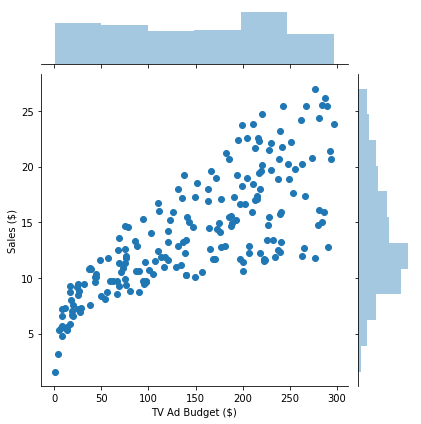

In [29]:
import seaborn as sns
sns.jointplot(x = 'TV Ad Budget ($)', y = 'Sales ($)', data=advData)

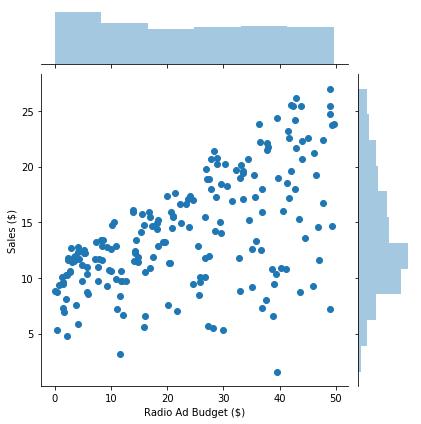

In [30]:
sns.jointplot(x = 'Radio Ad Budget ($)', y = 'Sales ($)', data=advData)

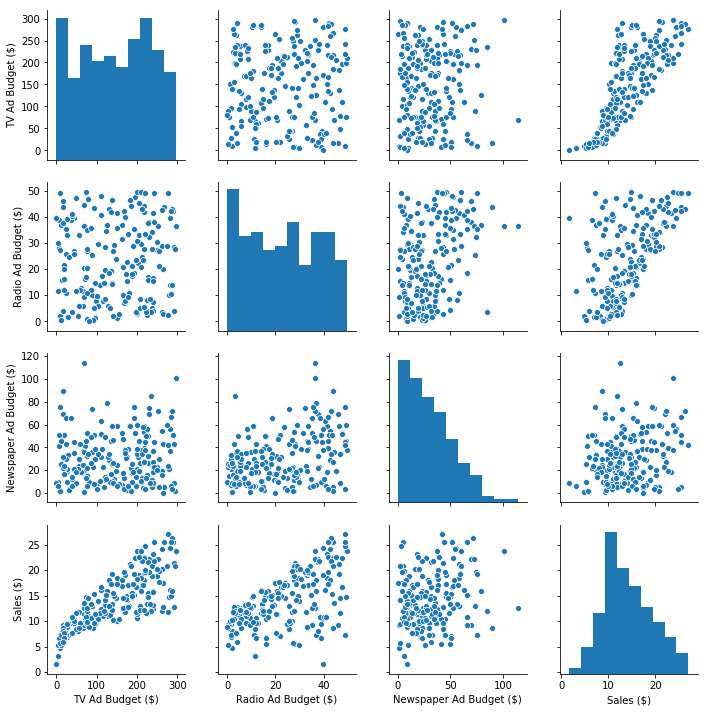

In [31]:
sns.pairplot(advData[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)']])

In [32]:
advData.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

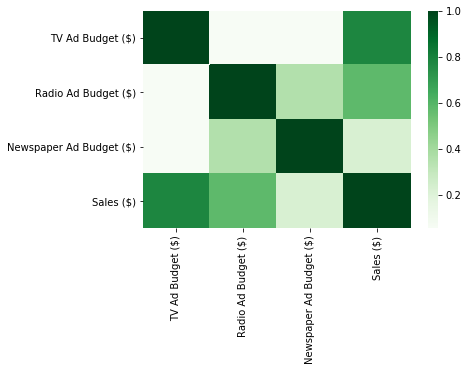

In [33]:
corr = advData.corr()
 
# Heatmap
sns.heatmap(corr, cmap="Greens")